In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erfc

Text(0.5, 0, 'n')

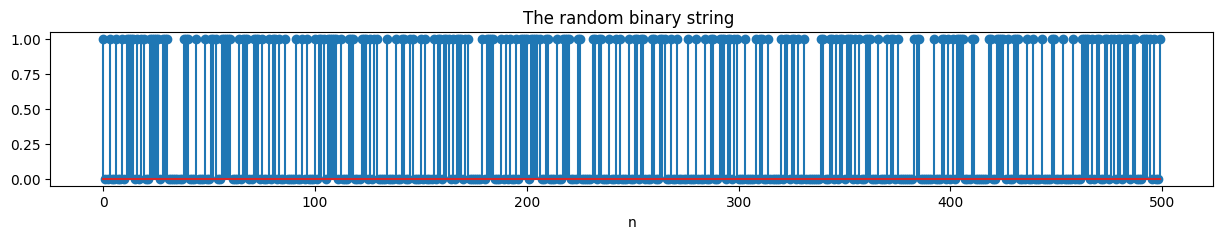

In [ ]:
N = 500    # Num bit
Tb = 1     # bit/second
T = 1*N    # Sampling rate
t = np.arange(0, Tb, Tb/100/N)
np.random.seed(120)
m = x = np.random.randint(2, size = N)
#figure
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.stem(m)
ax.set_title('The random binary string ')
ax.set_xlabel('n')

In [ ]:
# Square wave
def Square_wave():
    out = []
    t = np.arange(0, Tb, Tb/100)

    for i in range(len(m)):
        if m[i] == 0:
            x = np.zeros(len(t))
        else:
            x = np.ones(len(t))
        out.extend(x)
    return out
xv = Square_wave()

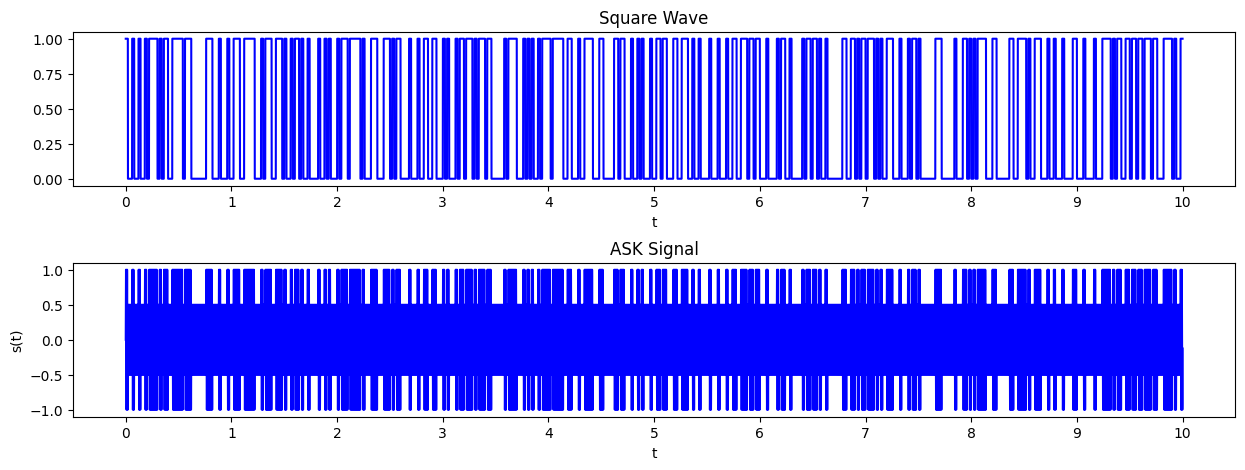

In [ ]:
# 2-ASK Modulation
# Modulation
f = 2    # Carrier frequency
A1 = 1    # Amplitude of carrier signal for bit 1
A2 = 0.5 # Amplitude of carrier signal for bit 0
s1 = A1 * np.sin(2 * np.pi * f * t)
s2 = A2 * np.sin(2 * np.pi * f * t)
def modulation():
    out = []
    # Orthonormal basis corresponding to signal cluster M: b(t) = \sqrt(2/T) * sin(2 * pi * f0 * t)
    # Signal cluster M = {s1(t); s2(t)}  (k = 1)
    t = np.arange(0, Tb, Tb/100)
    s1 = A1 * np.sin(2 * np.pi * f * t)
    s2 = A2 * np.sin(2 * np.pi * f * t)
    for i in range(len(m)):
        if m[i] == 0:
            out.extend(s2)
        if m[i] == 1:
            out.extend(s1)

    return out

ask = modulation()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(t, xv[:len(t)], 'b')  # Use xv[:len(t)] to match dimensions
plt.setp(ax[0], xticks=[0, 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9','10'])
ax[0].set_title('Square Wave')
ax[0].set_xlabel('t')

ax[1].plot(t, ask[:len(t)], 'b')
plt.setp(ax[1], xticks=[0, 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9','10'])
ax[1].set_title('ASK Signal')
ax[1].set_xlabel('t')
ax[1].set_ylabel('s(t)')

plt.show()


Text(0, 0.5, 'r(t)')

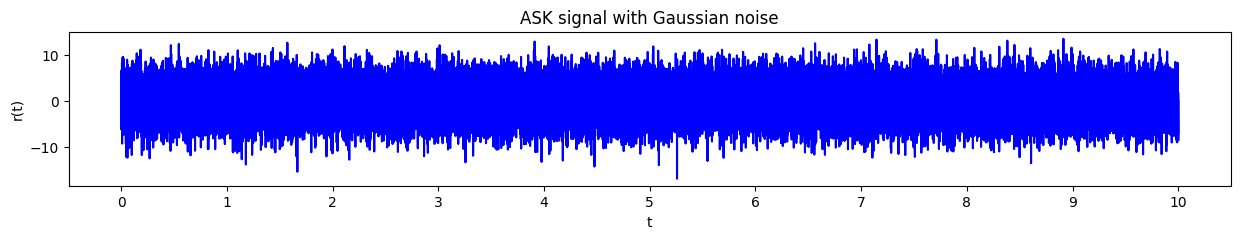

In [ ]:
# AWGN Noise
N0 = 25
noise = np.random.normal(0, np.sqrt(N0/2), len(ask)) # Gaussian noise with a mean value of 0 and standard deviation of np.sqrt(N0/2)
ask_noisy = ask + noise

fig, ax = plt.subplots(1, 1, figsize=(15, 2))

#Plotting
ax.figsize=(15, 5)
ax.plot(t, ask_noisy[:len(t)], 'b')
plt.setp(ax, xticks=[0, 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9','10'])
ax.set_title('ASK signal with Gaussian noise')
ax.set_xlabel('t')
ax.set_ylabel('r(t)')

Text(0.5, 0, 'n')

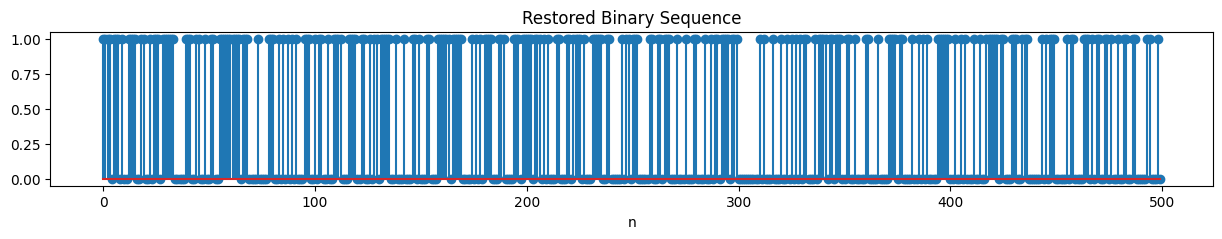

In [ ]:
# Demodulation
def demodulation():
    t = np.arange(0, Tb, Tb/100)
    hx = math.sqrt(2/Tb)*np.sin(2 * np.pi * f * t)
    ask_noisy_list = np.array_split(ask_noisy, N)
    output = []
    for i in range(len(ask_noisy_list)):
        if np.trapz(ask_noisy_list[i] * hx,t) >= np.sqrt(Tb/2)*(A1+A2)/2:
            output.append(1)
        else:
            output.append(0)
    return output

demod = demodulation()

#Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.stem(demod)
ax.set_title('Restored Binary Sequence')
ax.set_xlabel('n')

In [ ]:
def calculate_bit_error_rate(InitialBit, ReceivedBit):
    num_errors = 0
    for i in range(len(InitialBit)):
        if InitialBit[i] != ReceivedBit[i]:
            num_errors += 1
    ber = num_errors / len(InitialBit)
    return ber

In [ ]:
InitialBit = m
ReceivedBit = demod
ber = calculate_bit_error_rate(InitialBit, ReceivedBit)
print("Xác xuất lỗi bit: {:.2f}%".format(ber * 100))

Xác xuất lỗi bit: 34.00%


In [ ]:

E1 = np.trapz((s1**2),t*10)    # energy per bit for binary value '0'
E2 = np.trapz((s2**2),t*10)    # energy per bit for binary value '1'
Eb = 1/2 * (E1 + E2)
print(f"Bit Error Probability in theory: {1/2 * erfc(np.sqrt(Eb / N0)) * 100}%")

Bit Error Probability in theory: 30.85375387260981%
